# Gold Price Prediction using Random Forest 

### Downloading the dataset

The dataset for Gold Price prediction can be loaded from: <br>
https://www.kaggle.com/altruistdelhite04/gold-price-data

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Loading the dataset in a dataframe

In [2]:
df = pd.read_csv('gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.shape

(2290, 6)

The dataset has 2290 rows and 6 columns<br>
The columns names are as follows:<br>
SPX - Standard & Poor's 500 Index<br>
GLD - SPDR Gold Shares<br>
USO - United States Oil <br>
SLV - iShares Silver Trust<br>
EUR/USD - European Unioun Euro against United States Dollar

### Checking for missing values

In [6]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Analysing the correlation matrix

In [7]:
corr = df.corr()
corr

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


### Plotting the heatmap

<AxesSubplot:>

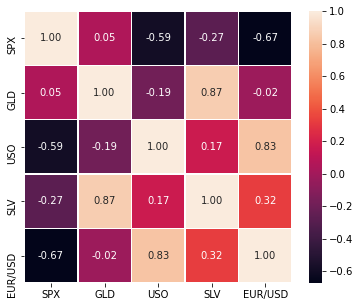

In [8]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot = True, fmt = '.2f', linewidths = 0.5)

### Sorting the correlation score with the column `GLD` in descending order

In [9]:
corr['GLD'].sort_values(ascending = False)

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

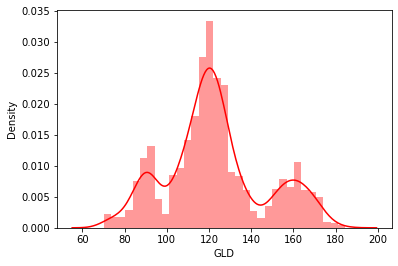

In [10]:
sns.distplot(df['GLD'], color = 'red')

In [11]:
print("Skewness: ", df["GLD"].skew())
print("Kurtosis: ", df["GLD"].kurt())

Skewness:  0.3341383472692508
Kurtosis:  -0.2750805233458311


### Relation of top 2 correlation score with GLD

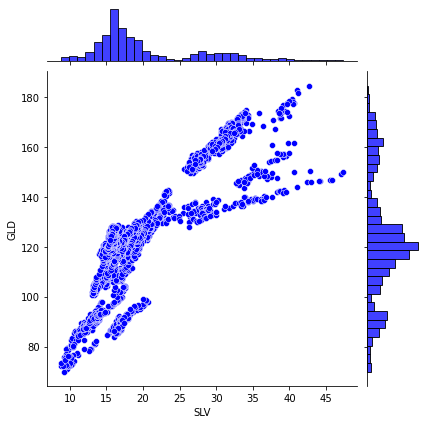

In [12]:
sns.jointplot(x=df['SLV'], y = df['GLD'], color = 'blue')

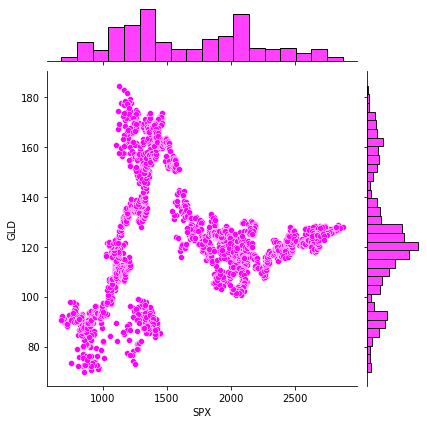

In [13]:
sns.jointplot(x=df["SPX"], y = df["GLD"], color = "magenta")

### Creating a matrix of features and target as X and y respectively

In [14]:
X = df.drop(["Date", "GLD"],axis=1).values
y = df["GLD"].values

### Spliting the dataset into training and testing data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

### Instantiating RandomForest and fitting it to training set

In [16]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

### Predicting the test set

In [17]:
y_pred = regressor.predict(X_test)

### Errors for regression `MAE`, `MSE`, `RMSE`

In [18]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1.297793151724892
MSE:  5.16257387057774
RMSE:  2.272129809358994


### Training and Test Accuracy

In [19]:
accuracy_train = regressor.score(X_train, y_train)
accuracy_test = regressor.score(X_test, y_test)
print([accuracy_train, accuracy_test])

[0.9984324726699736, 0.9899648553789232]


### Visualising the Accuracy of Predicted Result

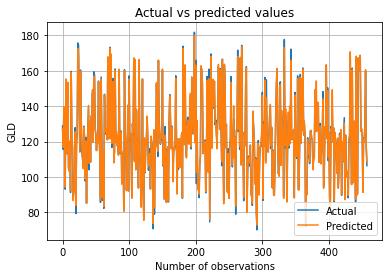

In [20]:
plt.plot(y_test, label = "Actual")
plt.plot(y_pred, label = "Predicted")
plt.grid(0.3)
plt.title("Actual vs predicted values")
plt.xlabel("Number of observations")
plt.ylabel("GLD")
plt.legend()
plt.show()

In [21]:
import pickle as pkl
filename = "model.pkl"  

with open(filename, 'wb') as file:  
    pkl.dump(regressor, file)